# Mercedes-Benz Greener Manufacturing

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import pandas_profiling as pp

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

C:\Users\PC\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#loading the dataset
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [4]:
df_train

ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
0        0  130.81   k  v  at  a  d   u  j  o  ...     0     0     1     0   
1        6   88.53   k  t  av  e  d   y  l  o  ...     1     0     0     0   
2        7   76.26  az  w   n  c  d   x  j  x  ...     0     0     0     0   
3        9   80.62  az  t   n  f  d   x  l  e  ...     0     0     0     0   
4       13   78.02  az  v   n  f  d   h  d  n  ...     0     0     0     0   
...    ...     ...  .. ..  .. .. ..  .. .. ..  ...   ...   ...   ...   ...   
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1     0   
4207  8415   87.48  al  r   e  f  d  aa  l  u  ...     0     0     0     0   
4208  8417  110.85   z  r  ae  c  d  aa  g  w  ...     1     0     0     0   

      X379  X380  X382  X383  X384  X385  
0        0     0     0     0     0     0  
1        0     0     0     0     0     0  
2        0     0     1     0     0     0  
3        0     0     0     0     0     0  
4        0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...  
4204     0     0     0     0     0     0  
4205     0     0     0     0     0     0  
4206     0     0     0     0     0     0  
4207     0     0     0     0     0     0  
4208     0     0     0     0     0     0  

[4209 rows x 378 columns]

In [345]:
#Understang the dataest
pp.ProfileReport(df_train)

In [5]:
#Understandingthe dataset statistically
df_train.describe()

ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16          X17  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean      0.057971     0.428130     0.000475     0.002613     0.007603  ...   
std       0.233716     0.494867     0.021796     0.051061     0.086872  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000     1.000000     0.000000     0.000000     0.000000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

              X375         X376         X377         X378         X379  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000   
mean      0.318841     0.057258     0.314802     0.020670     0.009503   
std       0.466082     0.232363     0.464492     0.142294     0.097033   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       1.000000     0.000000     1.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

              X380         X382         X383         X384         X385  
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  
mean      0.008078     0.007603     0.001663     0.000475     0.001426  
std       0.089524     0.086872     0.040752     0.021796     0.037734  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 370 columns]

In [6]:
for col_name in df_train.columns:
    if df_train[col_name].nunique()<2:
        print("Number of unique elements in "+col_name+" are ", df_train[col_name].nunique())
        print(df_train[col_name].unique())

Number of unique elements in X11 are  1
[0]
Number of unique elements in X93 are  1
[0]
Number of unique elements in X107 are  1
[0]
Number of unique elements in X233 are  1
[0]
Number of unique elements in X235 are  1
[0]
Number of unique elements in X268 are  1
[0]
Number of unique elements in X289 are  1
[0]
Number of unique elements in X290 are  1
[0]
Number of unique elements in X293 are  1
[0]
Number of unique elements in X297 are  1
[0]
Number of unique elements in X330 are  1
[0]
Number of unique elements in X347 are  1
[0]


# Removing the column with zero variance

In [7]:
df_train=df_train.drop(["X11","X93","X107","X233","X235","X268","X289","X290","X293","X297","X330","X347"],axis=1)
df_train

ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
0        0  130.81   k  v  at  a  d   u  j  o  ...     0     0     1     0   
1        6   88.53   k  t  av  e  d   y  l  o  ...     1     0     0     0   
2        7   76.26  az  w   n  c  d   x  j  x  ...     0     0     0     0   
3        9   80.62  az  t   n  f  d   x  l  e  ...     0     0     0     0   
4       13   78.02  az  v   n  f  d   h  d  n  ...     0     0     0     0   
...    ...     ...  .. ..  .. .. ..  .. .. ..  ...   ...   ...   ...   ...   
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1     0   
4207  8415   87.48  al  r   e  f  d  aa  l  u  ...     0     0     0     0   
4208  8417  110.85   z  r  ae  c  d  aa  g  w  ...     1     0     0     0   

      X379  X380  X382  X383  X384  X385  
0        0     0     0     0     0     0  
1        0     0     0     0     0     0  
2        0     0     1     0     0     0  
3        0     0     0     0     0     0  
4        0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...  
4204     0     0     0     0     0     0  
4205     0     0     0     0     0     0  
4206     0     0     0     0     0     0  
4207     0     0     0     0     0     0  
4208     0     0     0     0     0     0  

[4209 rows x 366 columns]

# Checking for null values

In [8]:
#checking for null values
df_train.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
       ..
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 366, dtype: int64

## There is no null values

In [9]:
#Data types of each column
df_train.dtypes.reset_index()

index        0
0      ID    int64
1       y  float64
2      X0   object
3      X1   object
4      X2   object
..    ...      ...
361  X380    int64
362  X382    int64
363  X383    int64
364  X384    int64
365  X385    int64

[366 rows x 2 columns]

In [10]:
#Data types of columns in tabular form
col_type=df_train.dtypes.reset_index()
col_type.columns=["count","column type"]
col_type.groupby("column type").aggregate('count').reset_index()

column type  count
0       int64    357
1     float64      1
2      object      8

In [12]:
#separating the categorical columns
Categorical_train = df_train.select_dtypes(include=['object']).copy()
Categorical_test = df_test.select_dtypes(include=['object']).copy()
Categorical_train

X0 X1  X2 X3 X4  X5 X6 X8
0      k  v  at  a  d   u  j  o
1      k  t  av  e  d   y  l  o
2     az  w   n  c  d   x  j  x
3     az  t   n  f  d   x  l  e
4     az  v   n  f  d   h  d  n
...   .. ..  .. .. ..  .. .. ..
4204  ak  s  as  c  d  aa  d  q
4205   j  o   t  d  d  aa  h  h
4206  ak  v   r  a  d  aa  g  e
4207  al  r   e  f  d  aa  l  u
4208   z  r  ae  c  d  aa  g  w

[4209 rows x 8 columns]

# Getting unique values from train and test dataset

In [13]:
for col_name in Categorical_train.columns:
    print("Number of unique elements in "+col_name+" are ", Categorical_train[col_name].nunique())
    print(Categorical_train[col_name].unique())

Number of unique elements in X0 are  47
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
Number of unique elements in X1 are  27
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
Number of unique elements in X2 are  44
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
Number of unique elements in X3 are  7
['a' 'e' 'c' 'f' 'd' 'b' 'g']
Number of unique elements in X4 are  4
['d' 'b' 'c' 'a']
Number of unique elements in X5 are  29
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
Number of unique elements in X6 are  12
['j' 'l' 'd' 'h' 'i

In [14]:
for col_name in Categorical_test.columns:
    print("Number of unique elements in "+col_name+" are ", Categorical_test[col_name].nunique())
    print(Categorical_test[col_name].unique())

Number of unique elements in X0 are  49
['az' 't' 'w' 'y' 'x' 'f' 'ap' 'o' 'ay' 'al' 'h' 'z' 'aj' 'd' 'v' 'ak'
 'ba' 'n' 'j' 's' 'af' 'ax' 'at' 'aq' 'av' 'm' 'k' 'a' 'e' 'ai' 'i' 'ag'
 'b' 'am' 'aw' 'as' 'r' 'ao' 'u' 'l' 'c' 'ad' 'au' 'bc' 'g' 'an' 'ae' 'p'
 'bb']
Number of unique elements in X1 are  27
['v' 'b' 'l' 's' 'aa' 'r' 'a' 'i' 'p' 'c' 'o' 'm' 'z' 'e' 'h' 'w' 'g' 'k'
 'y' 't' 'u' 'd' 'j' 'q' 'n' 'f' 'ab']
Number of unique elements in X2 are  45
['n' 'ai' 'as' 'ae' 's' 'b' 'e' 'ak' 'm' 'a' 'aq' 'ag' 'r' 'k' 'aj' 'ay'
 'ao' 'an' 'ac' 'af' 'ax' 'h' 'i' 'f' 'ap' 'p' 'au' 't' 'z' 'y' 'aw' 'd'
 'at' 'g' 'am' 'j' 'x' 'ab' 'w' 'q' 'ah' 'ad' 'al' 'av' 'u']
Number of unique elements in X3 are  7
['f' 'a' 'c' 'e' 'd' 'g' 'b']
Number of unique elements in X4 are  4
['d' 'b' 'a' 'c']
Number of unique elements in X5 are  32
['t' 'b' 'a' 'z' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac'
 'ad' 'ae' 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
Number of unique elements in X

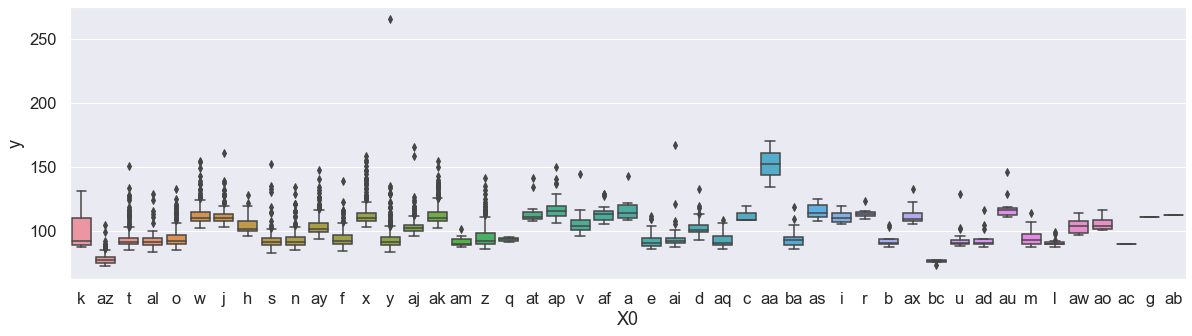

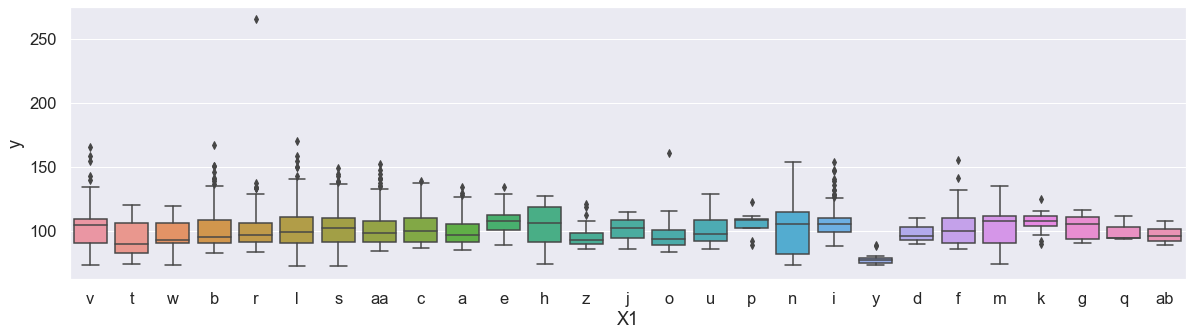

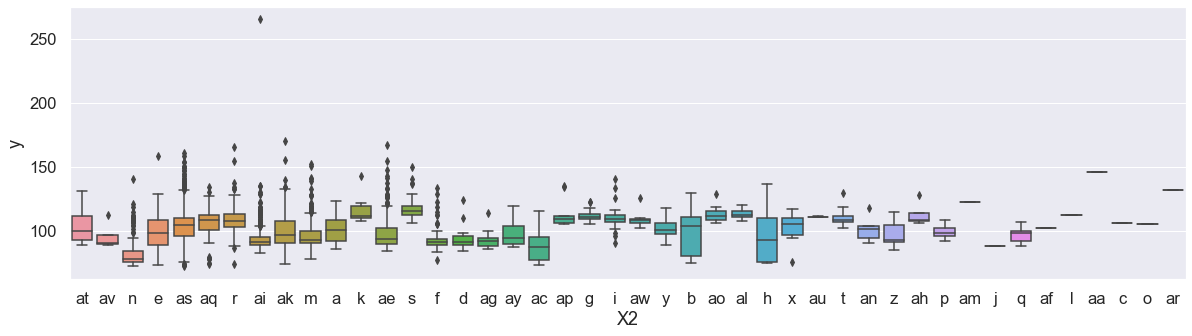

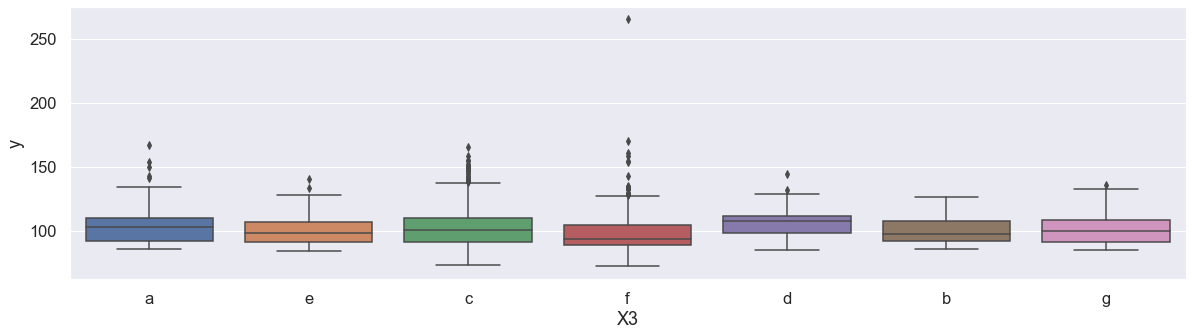

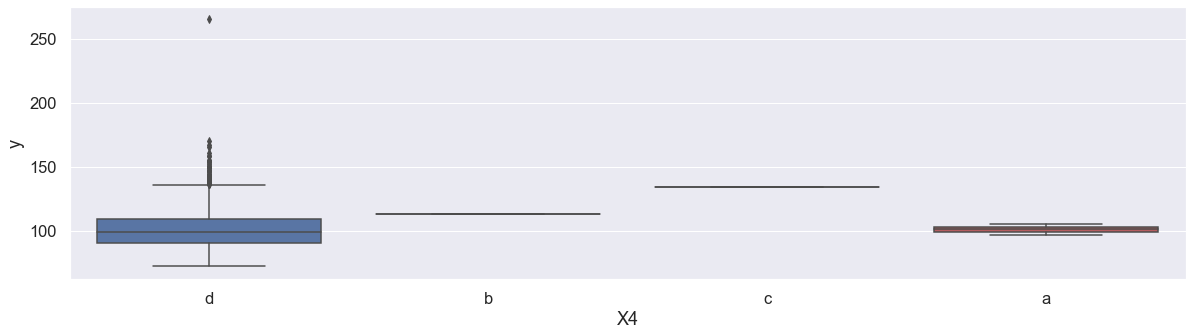

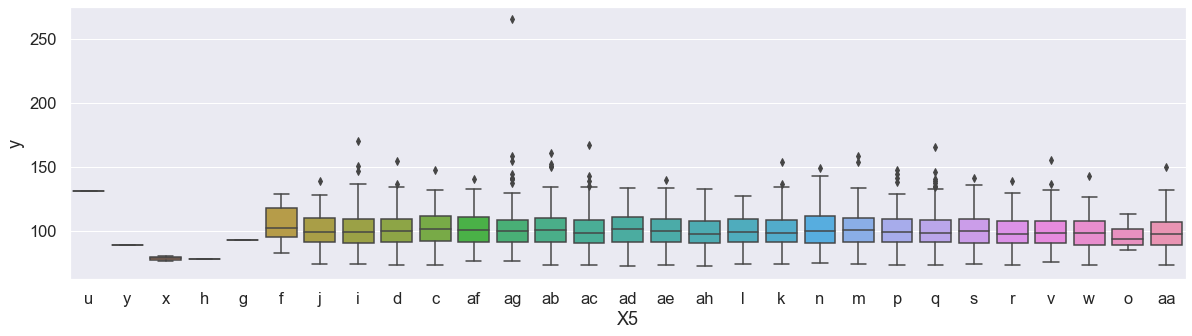

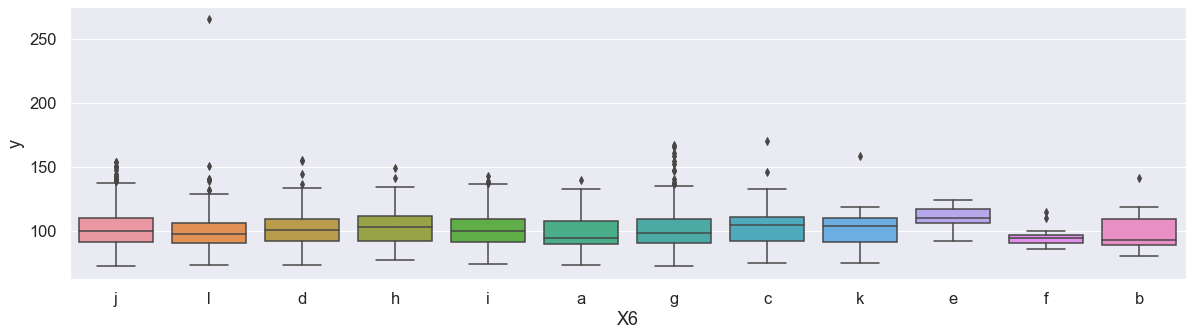

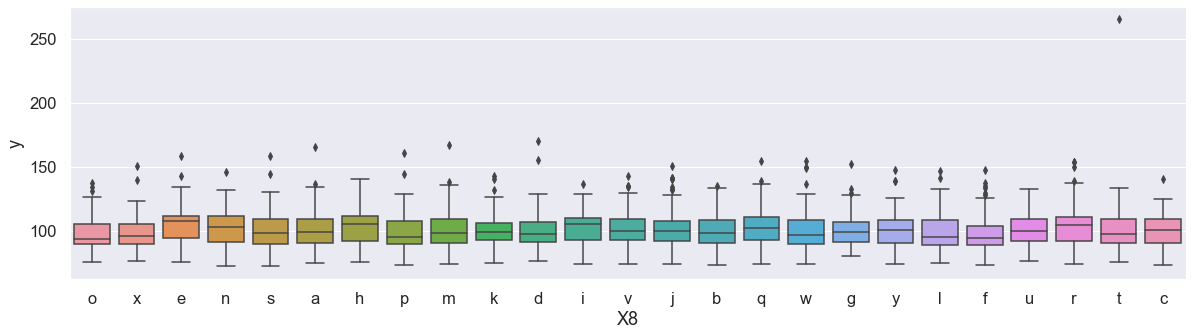

In [193]:
#Box plot for the categorical columns
col_name=["X0","X1","X2","X3","X4","X5","X6","X8"]
for col in col_name:
    plt.figure(figsize=(20,5))
    sns.boxplot(x=col, y="y", data=df)

In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [17]:
#Using stats model to find the importance of columns
model=ols('y ~ C(X0)', data=df_train).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df           F  PR(>F)
C(X0)     388859.137802    46.0  122.314076     0.0
Residual  287647.176541  4162.0         NaN     NaN

In [18]:
model=ols('y ~ C(X2)', data=df_train).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df          F         PR(>F)
C(X2)     152784.714860    43.0  28.256995  1.930684e-196
Residual  523721.599483  4165.0        NaN            NaN

In [19]:
model=ols('y ~ C(X4)', data=df_train).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F    PR(>F)
C(X4)       1261.638003     3.0  2.618897  0.049209
Residual  675244.676340  4205.0       NaN       NaN

In [20]:
model=ols('y ~ C(X5)', data=df_train).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

sum_sq      df         F    PR(>F)
C(X5)       9616.563103    28.0  2.152703  0.000404
Residual  666889.751240  4180.0       NaN       NaN

In [22]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
m_comp= pairwise_tukeyhsd(endog=df_train['y'],groups=df_train['X4'],alpha=0.05)
print(m_comp)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     a      b     11.7  0.862 -28.1874 51.5874  False
     a      c    32.94 0.1461  -6.9474 72.8274  False
     a      d  -0.4417    0.9 -23.4762 22.5927  False
     b      c    21.24 0.6199  -24.818  67.298  False
     b      d -12.1417 0.7474 -44.7135 20.4301  False
     c      d -33.3817 0.0421 -65.9535 -0.8099   True
-----------------------------------------------------


In [81]:
x=df_train.iloc[:,2:]
y=df_train.y

In [82]:
x

X0 X1  X2 X3 X4  X5 X6 X8  X10  X12  ...  X375  X376  X377  X378  X379  \
0      k  v  at  a  d   u  j  o    0    0  ...     0     0     1     0     0   
1      k  t  av  e  d   y  l  o    0    0  ...     1     0     0     0     0   
2     az  w   n  c  d   x  j  x    0    0  ...     0     0     0     0     0   
3     az  t   n  f  d   x  l  e    0    0  ...     0     0     0     0     0   
4     az  v   n  f  d   h  d  n    0    0  ...     0     0     0     0     0   
...   .. ..  .. .. ..  .. .. ..  ...  ...  ...   ...   ...   ...   ...   ...   
4204  ak  s  as  c  d  aa  d  q    0    0  ...     1     0     0     0     0   
4205   j  o   t  d  d  aa  h  h    0    0  ...     0     1     0     0     0   
4206  ak  v   r  a  d  aa  g  e    0    1  ...     0     0     1     0     0   
4207  al  r   e  f  d  aa  l  u    0    0  ...     0     0     0     0     0   
4208   z  r  ae  c  d  aa  g  w    0    0  ...     1     0     0     0     0   

      X380  X382  X383  X384  X385  
0        0     0     0     0     0  
1        0     0     0     0     0  
2        0     1     0     0     0  
3        0     0     0     0     0  
4        0     0     0     0     0  
...    ...   ...   ...   ...   ...  
4204     0     0     0     0     0  
4205     0     0     0     0     0  
4206     0     0     0     0     0  
4207     0     0     0     0     0  
4208     0     0     0     0     0  

[4209 rows x 364 columns]

# Applying encoder to convert text data to numerical form

In [83]:
x=pd.get_dummies(x)
x

X10  X12  X13  X14  X15  X16  X17  X18  X19  X20  ...  X8_p  X8_q  X8_r  \
0       0    0    1    0    0    0    0    1    0    0  ...     0     0     0   
1       0    0    0    0    0    0    0    1    0    0  ...     0     0     0   
2       0    0    0    0    0    0    1    0    0    0  ...     0     0     0   
3       0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
4       0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
4204    0    0    0    1    0    0    0    0    0    0  ...     0     1     0   
4205    0    0    0    0    0    0    0    0    0    0  ...     0     0     0   
4206    0    1    1    0    0    0    0    0    0    0  ...     0     0     0   
4207    0    0    0    1    0    0    0    0    0    0  ...     0     0     0   
4208    0    0    0    0    0    0    0    0    0    1  ...     0     0     0   

      X8_s  X8_t  X8_u  X8_v  X8_w  X8_x  X8_y  
0        0     0     0     0     0     0     0  
1        0     0     0     0     0     0     0  
2        0     0     0     0     0     1     0  
3        0     0     0     0     0     0     0  
4        0     0     0     0     0     0     0  
...    ...   ...   ...   ...   ...   ...   ...  
4204     0     0     0     0     0     0     0  
4205     0     0     0     0     0     0     0  
4206     0     0     0     0     0     0     0  
4207     0     0     1     0     0     0     0  
4208     0     0     0     0     1     0     0  

[4209 rows x 551 columns]

In [84]:
y=y.astype('int')

# Dimensionality reduction using select k best

In [85]:
#Select K Best to find the columns which are most significant
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_regression

In [29]:
predKbest= SelectKBest(f_regression, k='all').fit(x, y)

In [30]:
scores={"col":x.columns,"SValue":predKbest.scores_,"Pvalue":predKbest.pvalues_}
df = pd.DataFrame(scores)
df

col      SValue        Pvalue
0     X10    3.085904  7.904612e-02
1     X12   34.117304  5.580549e-09
2     X13   10.020183  1.559396e-03
3     X14  163.869597  7.799383e-37
4     X15    2.209566  1.372322e-01
..    ...         ...           ...
546  X8_u    0.166018  6.836958e-01
547  X8_v    2.044561  1.528253e-01
548  X8_w    3.006670  8.299572e-02
549  X8_x    2.912720  8.795735e-02
550  X8_y    0.457153  4.989947e-01

[551 rows x 3 columns]

In [31]:
df.nsmallest(10, ['SValue']) 

col    SValue    Pvalue
312  X340  0.000001  0.999183
269  X294  0.000450  0.983084
494  X5_d  0.000997  0.974814
481  X4_a  0.001341  0.970788
219  X240  0.004493  0.946564
335  X364  0.004493  0.946564
336  X365  0.004493  0.946564
28    X40  0.004754  0.945032
416  X1_l  0.005816  0.939211
506  X5_q  0.007880  0.929270

In [32]:
df.nlargest(60, ['Pvalue']) 

col    SValue    Pvalue
312   X340  0.000001  0.999183
269   X294  0.000450  0.983084
494   X5_d  0.000997  0.974814
481   X4_a  0.001341  0.970788
219   X240  0.004493  0.946564
335   X364  0.004493  0.946564
336   X365  0.004493  0.946564
28     X40  0.004754  0.945032
416   X1_l  0.005816  0.939211
506   X5_q  0.007880  0.929270
158   X175  0.007996  0.928753
191   X210  0.008529  0.926422
425   X1_u  0.009922  0.920660
304   X332  0.012801  0.909922
421   X1_q  0.013104  0.908867
20     X32  0.013202  0.908530
430   X2_a  0.013202  0.908530
310   X338  0.013894  0.906174
7      X18  0.017710  0.894139
337   X366  0.018513  0.891777
434  X2_af  0.020776  0.885398
107   X123  0.021162  0.884346
538   X8_m  0.029419  0.863823
441  X2_an  0.032896  0.856083
79     X92  0.034141  0.853417
466   X2_p  0.034141  0.853417
129   X145  0.036967  0.847541
472   X2_y  0.037274  0.846918
489  X5_ae  0.040910  0.839722
475   X3_b  0.047701  0.827124
499   X5_j  0.051014  0.821320
505   X5_p  0.051084  0.821199
123   X139  0.053538  0.817029
13     X24  0.054540  0.815355
165   X182  0.061088  0.804796
535   X8_j  0.076686  0.781853
480   X3_g  0.080747  0.776301
408   X1_d  0.087954  0.766809
354   X384  0.088726  0.765818
388   X0_k  0.125501  0.723161
188   X207  0.144883  0.703493
236   X257  0.144883  0.703493
453   X2_c  0.144883  0.703493
465   X2_o  0.144883  0.703493
102   X117  0.152511  0.696167
498   X5_i  0.156858  0.692086
99    X114  0.157817  0.691195
91    X105  0.165154  0.684476
471   X2_x  0.165154  0.684476
546   X8_u  0.166018  0.683696
528   X8_c  0.207891  0.648449
266   X288  0.211113  0.645920
508   X5_s  0.214337  0.643413
151   X168  0.214877  0.642996
405  X1_ab  0.229129  0.632195
532   X8_g  0.230053  0.631510
526   X8_a  0.235820  0.627267
30     X42  0.236699  0.626626
237   X258  0.256257  0.612730
411   X1_g  0.264503  0.607071

In [43]:
#selecting the columns with higher p value
unwantd_col=df[df["Pvalue"] > .05]
unwantd_col
np.array(unwantd_col['col'])

array(['X10', 'X15', 'X18', 'X24', 'X26', 'X32', 'X33', 'X36', 'X38',
       'X39', 'X40', 'X41', 'X42', 'X49', 'X57', 'X58', 'X59', 'X60',
       'X63', 'X65', 'X67', 'X70', 'X73', 'X74', 'X83', 'X86', 'X87',
       'X89', 'X91', 'X92', 'X95', 'X103', 'X104', 'X105', 'X114', 'X117',
       'X123', 'X124', 'X129', 'X133', 'X138', 'X139', 'X140', 'X141',
       'X143', 'X145', 'X146', 'X152', 'X153', 'X160', 'X161', 'X164',
       'X168', 'X173', 'X175', 'X181', 'X182', 'X184', 'X186', 'X190',
       'X192', 'X194', 'X195', 'X196', 'X200', 'X203', 'X206', 'X207',
       'X210', 'X213', 'X220', 'X226', 'X230', 'X240', 'X245', 'X246',
       'X248', 'X253', 'X254', 'X257', 'X258', 'X259', 'X260', 'X262',
       'X266', 'X280', 'X288', 'X292', 'X294', 'X295', 'X296', 'X307',
       'X318', 'X319', 'X321', 'X323', 'X324', 'X326', 'X332', 'X338',
       'X340', 'X345', 'X353', 'X356', 'X357', 'X358', 'X359', 'X361',
       'X364', 'X365', 'X366', 'X369', 'X374', 'X375', 'X384', 'X385',
     

In [86]:
x=x.drop(['X10', 'X15', 'X18', 'X24', 'X26', 'X32', 'X33', 'X36', 'X38',
       'X39', 'X40', 'X41', 'X42', 'X49', 'X57', 'X58', 'X59', 'X60',
       'X63', 'X65', 'X67', 'X70', 'X73', 'X74', 'X83', 'X86', 'X87',
       'X89', 'X91', 'X92', 'X95', 'X103', 'X104', 'X105', 'X114', 'X117',
       'X123', 'X124', 'X129', 'X133', 'X138', 'X139', 'X140', 'X141',
       'X143', 'X145', 'X146', 'X152', 'X153', 'X160', 'X161', 'X164',
       'X168', 'X173', 'X175', 'X181', 'X182', 'X184', 'X186', 'X190',
       'X192', 'X194', 'X195', 'X196', 'X200', 'X203', 'X206', 'X207',
       'X210', 'X213', 'X220', 'X226', 'X230', 'X240', 'X245', 'X246',
       'X248', 'X253', 'X254', 'X257', 'X258', 'X259', 'X260', 'X262',
       'X266', 'X280', 'X288', 'X292', 'X294', 'X295', 'X296', 'X307',
       'X318', 'X319', 'X321', 'X323', 'X324', 'X326', 'X332', 'X338',
       'X340', 'X345', 'X353', 'X356', 'X357', 'X358', 'X359', 'X361',
       'X364', 'X365', 'X366', 'X369', 'X374', 'X375', 'X384', 'X385',
       'X0_ab', 'X0_ac', 'X0_ad', 'X0_ao', 'X0_aw', 'X0_c', 'X0_d',
       'X0_g', 'X0_k', 'X0_q', 'X1_a', 'X1_aa', 'X1_ab', 'X1_b', 'X1_c',
       'X1_d', 'X1_f', 'X1_g', 'X1_h', 'X1_j', 'X1_l', 'X1_m', 'X1_n',
       'X1_p', 'X1_q', 'X1_r', 'X1_u', 'X1_v', 'X2_a', 'X2_af', 'X2_ak',
       'X2_am', 'X2_an', 'X2_at', 'X2_au', 'X2_av', 'X2_aw', 'X2_ay',
       'X2_b', 'X2_c', 'X2_e', 'X2_h', 'X2_j', 'X2_l', 'X2_o', 'X2_p',
       'X2_q', 'X2_x', 'X2_y', 'X2_z', 'X3_b', 'X3_e', 'X3_g', 'X4_a',
       'X4_b', 'X4_d', 'X5_aa', 'X5_ac', 'X5_ad', 'X5_ae', 'X5_af',
       'X5_ah', 'X5_c', 'X5_d', 'X5_f', 'X5_g', 'X5_h', 'X5_i', 'X5_j',
       'X5_k', 'X5_l', 'X5_m', 'X5_o', 'X5_p', 'X5_q', 'X5_s', 'X5_v',
       'X5_y', 'X6_b', 'X6_c', 'X6_d', 'X6_g', 'X6_i', 'X6_j', 'X6_k',
       'X8_a', 'X8_b', 'X8_c', 'X8_d', 'X8_g', 'X8_j', 'X8_k', 'X8_l',
       'X8_m', 'X8_n', 'X8_p', 'X8_q', 'X8_t', 'X8_u', 'X8_v', 'X8_w',
       'X8_x', 'X8_y'],axis=1)

In [45]:
#Spliting the data in train and test form
X_train, X_test , y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# KNeighborsClassifier

In [55]:
#Using K neighbors classifier
model_kneigh = KNeighborsClassifier()

In [56]:
model_kneigh.fit(X_train,y_train)
y_pred=model_kneigh.predict(X_train)

In [57]:
kf = KFold(n_splits=3, shuffle=True, random_state=None)
scores = cross_val_score(estimator=model_kneigh, 
                             X=X_train, 
                             y=y_train, 
                             cv=kf, 
                             scoring = 'neg_mean_squared_error' )    
print(scores.mean())

-129.48947725729803


In [51]:
y_pred=model_kneigh.predict(X_train)
print("Training scores")
print("Mean square error: %.2f"%mean_squared_error(y_train,y_pred))
print("r2 value: %.2f"%r2_score(y_train,y_pred))

y_pred=model_kneigh.predict(X_test)
print("Test scores")
print("Mean square error: %.2f"%mean_squared_error(y_test,y_pred))
print("r2 value: %.2f"%r2_score(y_test,y_pred))

Training scores
Mean square error: 116.67
r2 value: 0.30
Test scores
Mean square error: 107.75
r2 value: 0.28


In [52]:
#selecting best parameters
parameters = dict(
                n_neighbors= [3, 5, 7, 9, 11, 13, 15, 19, 23, 29],
                algorithm=  ['ball_tree', 'kd_tree', 'brute'],
                metric= ['minkowski'],
                p= [1, 2, 3],
                weights= ['uniform', 'distance'],
                leaf_size= [15, 30, 40, 50, 60]
            )

print(parameters)

{'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 19, 23, 29], 'algorithm': ['ball_tree', 'kd_tree', 'brute'], 'metric': ['minkowski'], 'p': [1, 2, 3], 'weights': ['uniform', 'distance'], 'leaf_size': [15, 30, 40, 50, 60]}


In [53]:
kf  = KFold(n_splits =5,shuffle=True, random_state=100)
grid = RandomizedSearchCV(estimator = model_kneigh, 
                   param_distributions = parameters, 
                   scoring    = 'r2',
                   cv=kf,
                   verbose=4)

In [54]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] weights=distance, p=3, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  weights=distance, p=3, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree, score=0.278, total=   7.9s
[CV] weights=distance, p=3, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.8s remaining:    0.0s


[CV]  weights=distance, p=3, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree, score=0.091, total=   7.9s
[CV] weights=distance, p=3, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.7s remaining:    0.0s


[CV]  weights=distance, p=3, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree, score=-0.391, total=   7.9s
[CV] weights=distance, p=3, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   23.6s remaining:    0.0s


[CV]  weights=distance, p=3, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree, score=0.331, total=   7.8s
[CV] weights=distance, p=3, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree 
[CV]  weights=distance, p=3, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree, score=0.305, total=   7.2s
[CV] weights=distance, p=1, n_neighbors=3, metric=minkowski, leaf_size=40, algorithm=kd_tree 
[CV]  weights=distance, p=1, n_neighbors=3, metric=minkowski, leaf_size=40, algorithm=kd_tree, score=0.309, total=   1.0s
[CV] weights=distance, p=1, n_neighbors=3, metric=minkowski, leaf_size=40, algorithm=kd_tree 
[CV]  weights=distance, p=1, n_neighbors=3, metric=minkowski, leaf_size=40, algorithm=kd_tree, score=0.071, total=   1.0s
[CV] weights=distance, p=1, n_neighbors=3, metric=minkowski, leaf_size=40, algorithm=kd_tree 
[CV]  weights=distance, p=1, n_neighbors=3, metric=minkowski, leaf_size=40, algorithm=kd_tree, score=-0.364, total=   0.9s
[CV] we

[CV]  weights=distance, p=1, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree, score=0.080, total=   1.3s
[CV] weights=distance, p=1, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree 
[CV]  weights=distance, p=1, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree, score=-0.368, total=   1.0s
[CV] weights=distance, p=1, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree 
[CV]  weights=distance, p=1, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree, score=0.322, total=   1.0s
[CV] weights=distance, p=1, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree 
[CV]  weights=distance, p=1, n_neighbors=5, metric=minkowski, leaf_size=40, algorithm=ball_tree, score=0.294, total=   0.9s
[CV] weights=distance, p=3, n_neighbors=19, metric=minkowski, leaf_size=50, algorithm=ball_tree 
[CV]  weights=distance, p=3, n_neighbors=19, metric=minkowski, leaf_size=50, algorithm=ball_tree, score=0.338, total= 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.9min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [15, 30, 40, 50, 60],
                                        'metric': ['minkowski'],
                                        'n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                 

In [638]:
print('Estimator: \n',    grid.best_estimator_)
print('Best params : \n', grid.best_params_)
print(grid.classes_)
print(grid.best_score_)

Estimator: 
 KNeighborsClassifier(algorithm='brute', leaf_size=15, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=1,
                     weights='distance')
Best params : 
 {'weights': 'distance', 'p': 1, 'n_neighbors': 19, 'metric': 'minkowski', 'leaf_size': 15, 'algorithm': 'brute'}
[ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 144
 146 147 148 149 150 152 153 154 155 158 160 165 169 265]
0.311650587725345


In [65]:
model=KNeighborsClassifier(algorithm='brute', leaf_size=15, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=1,
                     weights='distance')

In [66]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=15, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=1,
                     weights='distance')

In [67]:
y_pred=model.predict(X_train)
print("Training scores")
print("Mean square error: %.2f"%mean_squared_error(y_train,y_pred))
print("r2 value: %.2f"%r2_score(y_train,y_pred))

y_pred=model.predict(X_test)
print("Test scores")
print("Mean square error: %.2f"%mean_squared_error(y_test,y_pred))
print("r2 value: %.2f"%r2_score(y_test,y_pred))

Training scores
Mean square error: 21.14
r2 value: 0.87
Test scores
Mean square error: 88.30
r2 value: 0.41


# RandomForestClassifier

In [68]:
model_rf=RandomForestClassifier()
model_rf.fit(X_train,y_train)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
y_pred=model_rf.predict(X_train)
print("Training scores")
print("Mean square error: %.2f"%mean_squared_error(y_train,y_pred))
print("r2 value: %.2f"%r2_score(y_train,y_pred))

y_pred=model_rf.predict(X_test)
print("Test scores")
print("Mean square error: %.2f"%mean_squared_error(y_test,y_pred))
print("r2 value: %.2f"%r2_score(y_test,y_pred))

Training scores
Mean square error: 21.77
r2 value: 0.87
Test scores
Mean square error: 93.86
r2 value: 0.37


In [645]:
#selecting best parameters
params = {'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60],
          'criterion' :    ['gini','entropy'],
          'max_depth':    [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14],
          'max_features': ['sqrt', 'log2'],
          'min_samples_split': [0.1,0.2,0.3,0.4]
          }

In [646]:
grid = RandomizedSearchCV(estimator = RandomForestClassifier(), 
                   param_distributions = params, 
                   scoring    = 'r2',
                   cv=kf,
                   verbose=4)

In [647]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=40, min_samples_split=0.2, max_features=sqrt, max_depth=7, criterion=entropy 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=40, min_samples_split=0.2, max_features=sqrt, max_depth=7, criterion=entropy, score=0.483, total=   0.6s
[CV] n_estimators=40, min_samples_split=0.2, max_features=sqrt, max_depth=7, criterion=entropy 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=0.2, max_features=sqrt, max_depth=7, criterion=entropy, score=0.333, total=   0.3s
[CV] n_estimators=40, min_samples_split=0.2, max_features=sqrt, max_depth=7, criterion=entropy 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=40, min_samples_split=0.2, max_features=sqrt, max_depth=7, criterion=entropy, score=0.430, total=   0.3s
[CV] n_estimators=40, min_samples_split=0.2, max_features=sqrt, max_depth=7, criterion=entropy 
[CV]  n_estimators=40, min_samples_split=0.2, max_features=sqrt, max_depth=7, criterion=entropy, score=0.448, total=   0.2s

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s



[CV] n_estimators=40, min_samples_split=0.2, max_features=sqrt, max_depth=7, criterion=entropy 
[CV]  n_estimators=40, min_samples_split=0.2, max_features=sqrt, max_depth=7, criterion=entropy, score=0.512, total=   0.3s
[CV] n_estimators=5, min_samples_split=0.3, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=5, min_samples_split=0.3, max_features=log2, max_depth=10, criterion=gini, score=0.459, total=   0.1s
[CV] n_estimators=5, min_samples_split=0.3, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=5, min_samples_split=0.3, max_features=log2, max_depth=10, criterion=gini, score=0.077, total=   0.0s
[CV] n_estimators=5, min_samples_split=0.3, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=5, min_samples_split=0.3, max_features=log2, max_depth=10, criterion=gini, score=0.406, total=   0.0s
[CV] n_estimators=5, min_samples_split=0.3, max_features=log2, max_depth=10, criterion=gini 
[CV]  n_estimators=5, min_samples_split=0.3,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.1s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_l...
                                                    warm_start=False),
   

In [648]:
print('Estimator: \n',    grid.best_estimator_)
print('Best params : \n', grid.best_params_)
print(grid.classes_)
print(grid.best_score_)

Estimator: 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Best params : 
 {'n_estimators': 40, 'min_samples_split': 0.2, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'entropy'}
[ 72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 144
 146 147 148 149 150 152 153 154 155 158 160 165 169 265]
0.4411309907619202

In [70]:
rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [71]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
y_pred=rf.predict(X_train)
print("Training scores")
print("Mean square error: %.2f"%mean_squared_error(y_train,y_pred))
print("r2 value: %.2f"%r2_score(y_train,y_pred))

y_pred=rf.predict(X_test)
print("Test scores")
print("Mean square error: %.2f"%mean_squared_error(y_test,y_pred))
print("r2 value: %.2f"%r2_score(y_test,y_pred))

Training scores
Mean square error: 94.44
r2 value: 0.43
Test scores
Mean square error: 75.14
r2 value: 0.50


# GradientBoostingRegressor

In [73]:
Grad_boost = GradientBoostingRegressor(random_state=0)
Grad_boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [74]:
Grad_boost.get_params

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)>

In [654]:
y_pred=Grad_boost.predict(X_train)
print("Training scores")
print("Mean square error: %.2f"%mean_squared_error(y_train,y_pred))
print("r2 value: %.2f"%r2_score(y_train,y_pred))

y_pred=Grad_boost.predict(X_test)
print("Test scores")
print("Mean square error: %.2f"%mean_squared_error(y_test,y_pred))
print("r2 value: %.2f"%r2_score(y_test,y_pred))

Training scores
Mean square error: 62.40
r2 value: 0.62
Test scores
Mean square error: 58.71
r2 value: 0.61


In [655]:
params={'n_estimators':[500,750,1000,1250,1500,1750],
       'learning_rate' : [0.15,0.1,0.05,0.01,0.005,0.001],
       #max_depth' : [2,3,4,5,6,7,9,11,15]
       }

In [656]:
gb=RandomizedSearchCV(estimator = GradientBoostingRegressor(random_state=0), 
                   param_distributions = params, 
                   scoring    = 'neg_mean_squared_error',
                   cv=kf,
                   verbose=4)

In [657]:
gb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=500, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, learning_rate=0.001, score=-94.700, total=  24.4s
[CV] n_estimators=500, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.3s remaining:    0.0s


[CV]  n_estimators=500, learning_rate=0.001, score=-136.931, total=  21.9s
[CV] n_estimators=500, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   46.3s remaining:    0.0s


[CV]  n_estimators=500, learning_rate=0.001, score=-108.983, total=  23.3s
[CV] n_estimators=500, learning_rate=0.001 ...........................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV]  n_estimators=500, learning_rate=0.001, score=-103.963, total=  21.9s
[CV] n_estimators=500, learning_rate=0.001 ...........................
[CV]  n_estimators=500, learning_rate=0.001, score=-100.206, total=  20.9s
[CV] n_estimators=750, learning_rate=0.05 ............................
[CV]  n_estimators=750, learning_rate=0.05, score=-64.829, total=  23.2s
[CV] n_estimators=750, learning_rate=0.05 ............................
[CV]  n_estimators=750, learning_rate=0.05, score=-117.487, total=  24.9s
[CV] n_estimators=750, learning_rate=0.05 ............................
[CV]  n_estimators=750, learning_rate=0.05, score=-80.641, total=  22.2s
[CV] n_estimators=750, learning_rate=0.05 ............................
[CV]  n_estimators=750, learning_rate=0.05, score=-69.777, total=  21.3s
[CV] n_estimators=750, learning_rate=0.05 ............................
[CV]  n_estimators=750, learning_rate=0.05, score=-70.177, total=  21.3s
[CV] n_estimators=1000, learning_rate=0.01 ...............

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 28.5min finished


[CV]  n_estimators=1250, learning_rate=0.1, score=-76.196, total=  44.3s


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,...
                                           

In [658]:
print('Estimator: \n',    gb.best_estimator_)
print('Best params : \n', gb.best_params_)

Estimator: 
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
Best params : 
 {'n_estimators': 1000, 'learning_rate': 0.01}


In [659]:
params={#'n_estimators':[500,750,1000,1250,1500,1750],
       #'learning_rate' : [0.15,0.1,0.05,0.01,0.005,0.001],
       'max_depth' : [2,3,4,5,6,7,9,11,15]
       }

In [660]:
gb=RandomizedSearchCV(estimator = GradientBoostingRegressor(random_state=0), 
                   param_distributions = params, 
                   scoring    = 'neg_mean_squared_error',
                   cv=kf,
                   verbose=4)

In [661]:
gb.fit(X_train, y_train)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] max_depth=2 .....................................................
[CV] ....................... max_depth=2, score=-61.583, total=   1.6s
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV] ...................... max_depth=2, score=-108.524, total=   1.5s
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.0s remaining:    0.0s


[CV] ....................... max_depth=2, score=-72.019, total=   1.7s
[CV] max_depth=2 .....................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.7s remaining:    0.0s


[CV] ....................... max_depth=2, score=-65.322, total=   1.6s
[CV] max_depth=2 .....................................................
[CV] ....................... max_depth=2, score=-63.869, total=   1.5s
[CV] max_depth=3 .....................................................
[CV] ....................... max_depth=3, score=-63.024, total=   3.1s
[CV] max_depth=3 .....................................................
[CV] ...................... max_depth=3, score=-109.562, total=   2.8s
[CV] max_depth=3 .....................................................
[CV] ....................... max_depth=3, score=-74.196, total=   2.9s
[CV] max_depth=3 .....................................................
[CV] ....................... max_depth=3, score=-66.817, total=   3.0s
[CV] max_depth=3 .....................................................
[CV] ....................... max_depth=3, score=-65.404, total=   3.1s
[CV] max_depth=4 .....................................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  7.9min finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,...
                                           

In [662]:
print('Estimator: \n',    gb.best_estimator_)
print('Best params : \n', gb.best_params_)

Estimator: 
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
Best params : 
 {'max_depth': 2}


In [75]:
Grad_boost = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
Grad_boost.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.01, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [76]:
y_pred=Grad_boost.predict(X_train)
print("Training scores")
print("Mean square error: %.2f"%mean_squared_error(y_train,y_pred))
print("r2 value: %.2f"%r2_score(y_train,y_pred))

y_pred=Grad_boost.predict(X_test)
print("Test scores")
print("Mean square error: %.2f"%mean_squared_error(y_test,y_pred))
print("r2 value: %.2f"%r2_score(y_test,y_pred))

Training scores
Mean square error: 72.22
r2 value: 0.56
Test scores
Mean square error: 58.09
r2 value: 0.61


# Extreme gradient boosting

In [77]:
dtrain = xgb.DMatrix(X_train,label=y_train)
dtest = xgb.DMatrix(X_test,label=y_test)

In [78]:
params={'max_depth':10,'min_child_weight':6,'eta':0.005,'subsample':0.8,'colsample_bytree':1,'objective':'reg:linear','eval_metric':'mae'}

In [79]:
model_xgb=xgb.train(params,dtrain,num_boost_round=999,evals=[(dtest,"Test")],early_stopping_rounds=10)

[09:08:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:98.98171
Will train until Test-mae hasn't improved in 10 rounds.
[1]	Test-mae:98.48631
[2]	Test-mae:97.99307
[3]	Test-mae:97.50230
[4]	Test-mae:97.01371
[5]	Test-mae:96.52846
[6]	Test-mae:96.04481
[7]	Test-mae:95.56376
[8]	Test-mae:95.08579
[9]	Test-mae:94.60962
[10]	Test-mae:94.13580
[11]	Test-mae:93.66469
[12]	Test-mae:93.19544
[13]	Test-mae:92.72828
[14]	Test-mae:92.26347
[15]	Test-mae:91.80183
[16]	Test-mae:91.34222
[17]	Test-mae:90.88446
[18]	Test-mae:90.42934
[19]	Test-mae:89.97705
[20]	Test-mae:89.52624
[21]	Test-mae:89.07731
[22]	Test-mae:88.63187
[23]	Test-mae:88.18751
[24]	Test-mae:87.74631
[25]	Test-mae:87.30695
[26]	Test-mae:86.86979
[27]	Test-mae:86.43405
[28]	Test-mae:86.00145
[29]	Test-mae:85.57066
[30]	Test-mae:85.14249
[31]	Test-mae:84.71580
[32]	Test-mae:84.29185
[33]	Test-mae:83.8

[337]	Test-mae:18.13504
[338]	Test-mae:18.04506
[339]	Test-mae:17.95379
[340]	Test-mae:17.86379
[341]	Test-mae:17.77313
[342]	Test-mae:17.68412
[343]	Test-mae:17.59532
[344]	Test-mae:17.50740
[345]	Test-mae:17.41942
[346]	Test-mae:17.33195
[347]	Test-mae:17.24476
[348]	Test-mae:17.15850
[349]	Test-mae:17.07278
[350]	Test-mae:16.98780
[351]	Test-mae:16.90289
[352]	Test-mae:16.81842
[353]	Test-mae:16.73437
[354]	Test-mae:16.65073
[355]	Test-mae:16.56781
[356]	Test-mae:16.48509
[357]	Test-mae:16.40303
[358]	Test-mae:16.32074
[359]	Test-mae:16.23878
[360]	Test-mae:16.15698
[361]	Test-mae:16.07671
[362]	Test-mae:15.99559
[363]	Test-mae:15.91608
[364]	Test-mae:15.83688
[365]	Test-mae:15.75798
[366]	Test-mae:15.67915
[367]	Test-mae:15.60121
[368]	Test-mae:15.52351
[369]	Test-mae:15.44634
[370]	Test-mae:15.36856
[371]	Test-mae:15.29154
[372]	Test-mae:15.21552
[373]	Test-mae:15.13899
[374]	Test-mae:15.06314
[375]	Test-mae:14.98861
[376]	Test-mae:14.91355
[377]	Test-mae:14.83941
[378]	Test-mae:1

[688]	Test-mae:5.00472
[689]	Test-mae:5.00147
[690]	Test-mae:4.99817
[691]	Test-mae:4.99489
[692]	Test-mae:4.99197
[693]	Test-mae:4.98889
[694]	Test-mae:4.98615
[695]	Test-mae:4.98328
[696]	Test-mae:4.98034
[697]	Test-mae:4.97762
[698]	Test-mae:4.97501
[699]	Test-mae:4.97253
[700]	Test-mae:4.96994
[701]	Test-mae:4.96767
[702]	Test-mae:4.96519
[703]	Test-mae:4.96351
[704]	Test-mae:4.96049
[705]	Test-mae:4.95801
[706]	Test-mae:4.95594
[707]	Test-mae:4.95331
[708]	Test-mae:4.95137
[709]	Test-mae:4.94943
[710]	Test-mae:4.94712
[711]	Test-mae:4.94499
[712]	Test-mae:4.94315
[713]	Test-mae:4.94102
[714]	Test-mae:4.93889
[715]	Test-mae:4.93748
[716]	Test-mae:4.93548
[717]	Test-mae:4.93448
[718]	Test-mae:4.93274
[719]	Test-mae:4.93143
[720]	Test-mae:4.92954
[721]	Test-mae:4.92814
[722]	Test-mae:4.92673
[723]	Test-mae:4.92509
[724]	Test-mae:4.92397
[725]	Test-mae:4.92316
[726]	Test-mae:4.92179
[727]	Test-mae:4.92082
[728]	Test-mae:4.91976
[729]	Test-mae:4.91905
[730]	Test-mae:4.91816
[731]	Test-

In [80]:
y_pred=model_xgb.predict(dtrain)
print("Training scores")
print("Mean square error: %.2f"%mean_squared_error(y_train,y_pred))
print("r2 value: %.2f"%r2_score(y_train,y_pred))

y_pred=model_xgb.predict(dtest)
print("Test scores")
print("Mean square error: %.2f"%mean_squared_error(y_test,y_pred))
print("r2 value: %.2f"%r2_score(y_test,y_pred))

Training scores
Mean square error: 57.54
r2 value: 0.65
Test scores
Mean square error: 63.01
r2 value: 0.58
